<a href="https://colab.research.google.com/github/Vanitha-Jain/capstone/blob/Model-building/Lazy%20Classifier%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lazypredict

In [ ]:
import pandas as pd
df=pd.read_csv('/content/combined_dataset_FS2.csv')
df

,Unnamed: 0,APC2D1_C_N,APC2D1_C_O,APC2D2_N_O,APC2D3_C_N,APC2D4_C_X,APC2D5_N_X,APC2D5_O_F,APC2D7_N_O,APC2D7_O_O,...,AD2D336,AD2D404,AD2D414,AD2D482,AD2D492,AD2D559,AD2D560,AD2D569,AD2D570,AD2D704
0,0,1,3,2,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,2,2,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,1,2,2,4,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,1,2,2,4,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4,1,2,2,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1224,3,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1225,1225,2,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,1226,2,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1227,1227,2,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.isna().sum()
df.dropna(inplace=True)

In [ ]:
X = df.drop('class', axis=1)
Y = df['class']

In [ ]:
Y = df['class']
Y

,class
0,0
1,0
2,0
3,0
4,0
...,...
1224,0
1225,0
1226,0
1227,0


In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,random_state=100)

In [ ]:
X_train.shape, Y_train.shape

((860, 211), (860,))

In [ ]:
X_test.shape, Y_test.shape

((369, 211), (369,))

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
models

 97%|█████████▋| 31/32 [00:11<00:00,  3.21it/s]

[LightGBM] [Info] Number of positive: 325, number of negative: 535
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 860, number of used features: 211
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377907 -> initscore=-0.498442
[LightGBM] [Info] Start training from score -0.498442


100%|██████████| 32/32 [00:12<00:00,  2.67it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.89,0.87,0.87,0.88,0.73
RandomForestClassifier,0.89,0.87,0.87,0.88,0.86
LGBMClassifier,0.88,0.87,0.87,0.88,0.29
KNeighborsClassifier,0.88,0.87,0.87,0.88,0.13
BaggingClassifier,0.87,0.85,0.85,0.87,0.42
DecisionTreeClassifier,0.86,0.84,0.84,0.86,0.13
SVC,0.86,0.83,0.83,0.85,0.32
NuSVC,0.85,0.82,0.82,0.85,0.23
ExtraTreeClassifier,0.84,0.81,0.81,0.83,0.07


Model Label Spreading could not be evaluated. Error: Input contains NaN.
Model Label Propagation could not be evaluated. Error: Input contains NaN.
Model LightGBM could not be evaluated. Error: Do not support special JSON characters in feature name.


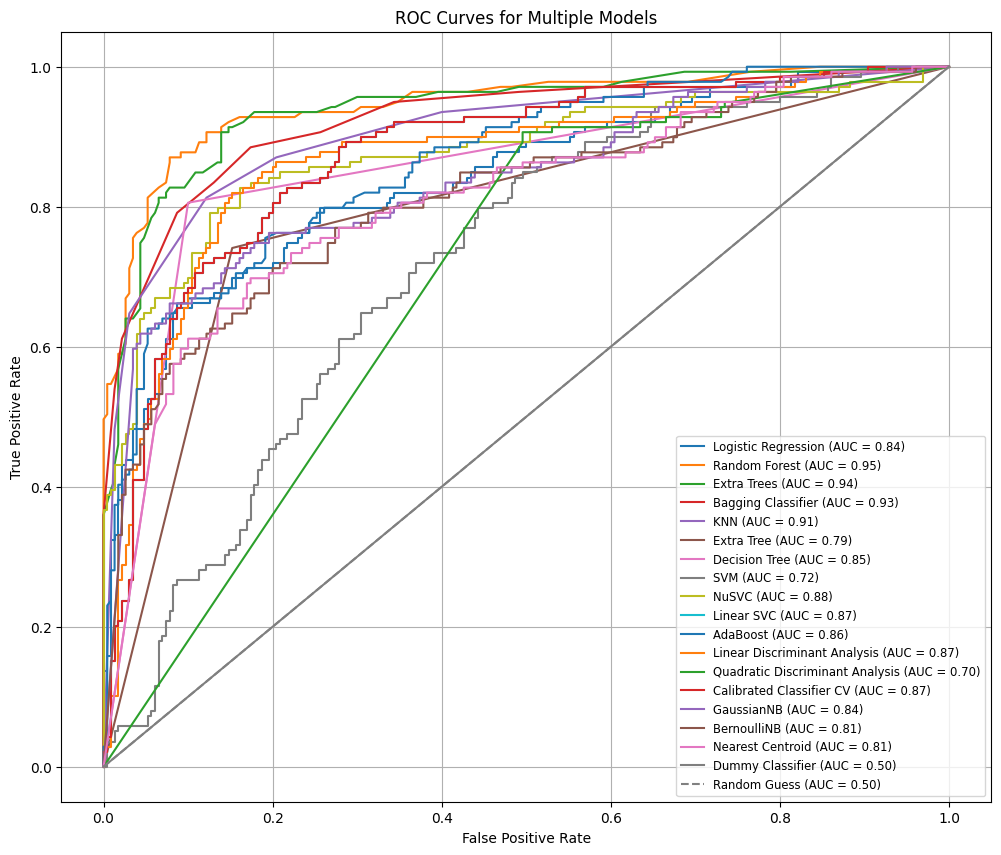

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Import classifiers
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    RidgeClassifierCV,
    SGDClassifier,
    PassiveAggressiveClassifier,
    Perceptron,
)
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from lightgbm import LGBMClassifier

# Define models to evaluate
models_to_evaluate = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Extra Tree": ExtraTreeClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "NuSVC": NuSVC(probability=True),
    "Linear SVC": CalibratedClassifierCV(LinearSVC(), cv=5),
    "Ridge Classifier": RidgeClassifier(),
    "Ridge Classifier CV": RidgeClassifierCV(),
    "AdaBoost": AdaBoostClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Calibrated Classifier CV": CalibratedClassifierCV(),
    "Label Spreading": LabelSpreading(),
    "Label Propagation": LabelPropagation(),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "SGD Classifier": SGDClassifier(),
    "Passive Aggressive": PassiveAggressiveClassifier(),
    "Perceptron": Perceptron(),
    "Nearest Centroid": NearestCentroid(),
    "Dummy Classifier": DummyClassifier(),
    "LightGBM": LGBMClassifier()
}
# Initialize a figure for the ROC plots
plt.figure(figsize=(12, 10))

# Binarize the labels for ROC curve calculation (ensure y is binary: [0, 1])
Y_bin = label_binarize(Y_test, classes=[0, 1])

# Loop through each model
for model_name, model in models_to_evaluate.items():
    try:
        # Train the model
        model.fit(X_train, Y_train)
        # Predict probabilities
        Y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        if Y_proba is not None:
            # Calculate ROC curve
            fpr, tpr, _ = roc_curve(Y_test, Y_proba)
            # Calculate the AUC
            roc_auc = auc(fpr, tpr)
            # Plot the ROC curve
            plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    except Exception as e:
        print(f"Model {model_name} could not be evaluated. Error: {e}")

# Plot random chance line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess (AUC = 0.50)")
# Customize the plot
plt.title("ROC Curves for Multiple Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize='small')
plt.grid()
plt.show()